# Dataset 

In [298]:
# Veri seti Acıklaması
# Veri seti Adı: Hmelq bir finans verisidir. İnsanların çeşitli niteliklere göre kredilerini ödeyip ödemedigi 
# bilgilerini tutar

#*BAD:The response(or Y) variable is BAD, which is coded as 0 (good risk) or 1 (bad risk).

#*LOAN: The amount of the loan requested( İstenen kredi miktarı) 
#(Daha az kredi talep eden adayların gelecekteki kredilerde temerrüde düşmeme ihtimalleri daha yüksek olmalıdır)

#*MORTDUE: How much the customer needs to pay on their mortgage(Müşterinin ipotek ödemesinde ne kadar ödeme yapması gerekiyor)
#(Daha az ipoteğe sahip olan başvuru sahiplerinin gelecekteki kredilerde temerrüde düşmeme ihtimalleri daha yüksek) 

#*VALUE: Assessed valuation (Değerlendirilen değer, geçerli vergileri ölçmek için bir mülke atanan dolar değeridir)
#(Mevcut mülkün değeri daha düşükse, gelecekteki kredilerde temerrüde düşme olasılığı daha az olmalıdır)

#*REASON: Debt consolidation or home improvement (DebtCon or HomeImp) (Ödemesi gelen borcu ertelemekj için alınan kredi)
#(Krediyi kullanma sebebinin temerrüde düşme şansı üzerinde de etkisi olabilir)

#*JOB: Broad job category
#*YOJ: Years on the job

#*DEROG: Number of derogatory reports (Negatif bir rapor , ödemeni geç yaparsan , ödemezsen vb.)
#(Aşağılayıcı raporlar kredi geçmişinde her zaman olumsuz bir işarettir ve bu sütundaki herhangi 
 #bir sayı gelecekte yüksek varsayılan temerrüt şansını göstermelidir.)
    
#*DELINQ: The number of delinquent trade lines (or credit accounts) (Aylık ödemesini 30günden fazla geciktirme sayısı)
#(Bir kişi geçmişte birkaç kez temerrüde düşmüş olsaydı, temerrüt şansı daha yüksek olurdu)
#(Ödenmemiş borçların sayısı)

#*CLAGE: Age of oldest trade line (oldest tradeline= credit account)
#*NINQ: Number of recent credit inquiries (Soft inquiries are usually made when you request a credit report or credit score for yourself.)
#*CLNO: Number of trade lines

#*DEBTINC: Debt to income ratio (Borç - Gelir oranı. Aylık toplam borcunun aylık toplam gelirine bölümü ile çıkarılan yüzdelik oran)
#(Bir kişinin gelir konusunda yüksek borcu varsa, o kişinin daha fazla borç geri ödemesi zor olacaktır, 
#bu nedenle bu rakamdaki yüksek bir rakam temerrüt)

In [299]:
# İmport Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [300]:
hmelq=pd.read_csv("hmelq.csv")
df=hmelq.copy()

In [301]:
df.shape

(3576, 13)

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
bad        3576 non-null int64
loan       3576 non-null int64
mortdue    3262 non-null float64
value      3512 non-null float64
reason     3429 non-null object
job        3409 non-null object
yoj        3264 non-null float64
derog      3149 non-null float64
delinq     3225 non-null float64
clage      3397 non-null float64
ninq       3273 non-null float64
clno       3443 non-null float64
debtinc    2809 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 363.3+ KB


In [303]:
df.dtypes

bad          int64
loan         int64
mortdue    float64
value      float64
reason      object
job         object
yoj        float64
derog      float64
delinq     float64
clage      float64
ninq       float64
clno       float64
debtinc    float64
dtype: object

In [304]:
# veri setindeki numeric degiskenleri secip özet istatistiklere bakıldı
df_num=df.select_dtypes(include=['float64','int64'])
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
bad,3576.0,0.199385,0.399594,0.00,0.00,0.000,0.00,1.000
loan,3576.0,18529.697987,11262.834060,1100.00,11000.00,16200.000,23100.00,89900.000
mortdue,3262.0,74013.907992,44016.833772,2619.00,46700.25,65858.000,91717.00,399550.000
value,3512.0,101076.922759,54865.275351,8800.00,65753.00,89183.000,118928.25,850000.000
yoj,3264.0,8.832644,7.568046,0.00,3.00,7.000,13.00,41.000
derog,3149.0,0.261670,0.865178,0.00,0.00,0.000,0.00,10.000
delinq,3225.0,0.432558,1.099230,0.00,0.00,0.000,0.00,15.000
clage,3397.0,179.832529,87.066198,0.49,115.60,173.640,230.71,1168.230
ninq,3273.0,1.186373,1.728723,0.00,0.00,1.000,2.00,17.000
clno,3443.0,21.507116,10.167490,0.00,15.00,20.000,26.00,71.000


In [305]:
# veri setindeki kategorik degiskenler secilir
cat_df=df.select_dtypes(include=["object"])
cat_df

,reason,job
0,HomeImp,NaN
1,DebtCon,NaN
2,DebtCon,NaN
3,DebtCon,NaN
4,DebtCon,NaN
...,...,...
3571,DebtCon,Self
3572,DebtCon,Self
3573,DebtCon,Self
3574,HomeImp,Self


In [306]:
# kategorik degiskenlerin frekans bilgisi 
print(df["bad"].value_counts())
print(df["reason"].value_counts())
print(df["job"].value_counts())


0    2863
1     713
Name: bad, dtype: int64
DebtCon    2371
HomeImp    1058
Name: reason, dtype: int64
Other     1431
ProfEx     767
Office     569
Mgr        461
Self       115
Sales       66
Name: job, dtype: int64


##  Exploratory Data Analysis (EDA)

In [307]:
# degiskenlerin  birbiriyle olan korelasyonlarına bakıldı 
df_num.corr()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
bad,1.000000,-0.071523,-0.056226,-0.050254,-0.051532,0.270980,0.345548,-0.150367,0.174759,-0.008981,0.236738
loan,-0.071523,1.000000,0.229546,0.337453,0.123293,-0.001463,-0.021577,0.089030,0.048633,0.092377,0.093636
mortdue,-0.056226,0.229546,1.000000,0.873280,-0.089949,-0.053310,-0.004971,0.141236,0.029452,0.340139,0.167358
value,-0.050254,0.337453,0.873280,1.000000,0.002501,-0.057279,-0.011014,0.182226,-0.005191,0.290439,0.134187
yoj,-0.051532,0.123293,-0.089949,0.002501,1.000000,-0.073500,0.065401,0.184283,-0.067735,0.017809,-0.052290
derog,0.270980,-0.001463,-0.053310,-0.057279,-0.073500,1.000000,0.234706,-0.083755,0.163750,0.048631,0.032324
delinq,0.345548,-0.021577,-0.004971,-0.011014,0.065401,0.234706,1.000000,0.044245,0.081166,0.151996,0.076943
clage,-0.150367,0.089030,0.141236,0.182226,0.184283,-0.083755,0.044245,1.000000,-0.113367,0.221071,-0.042852
ninq,0.174759,0.048633,0.029452,-0.005191,-0.067735,0.163750,0.081166,-0.113367,1.000000,0.097669,0.133751
clno,-0.008981,0.092377,0.340139,0.290439,0.017809,0.048631,0.151996,0.221071,0.097669,1.000000,0.180983


In [308]:
# degiskenlere ait histogram grafikleri

C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


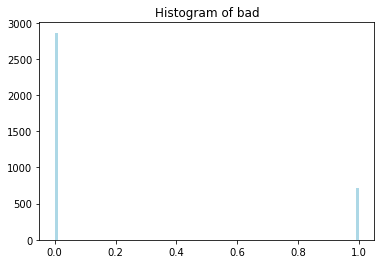

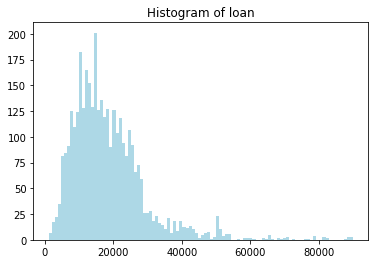

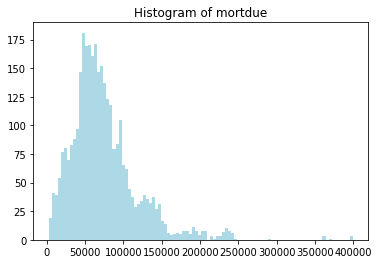

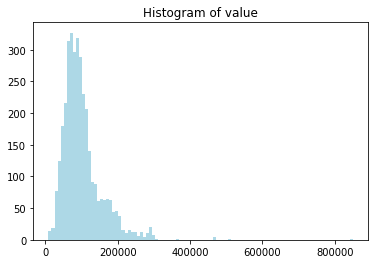

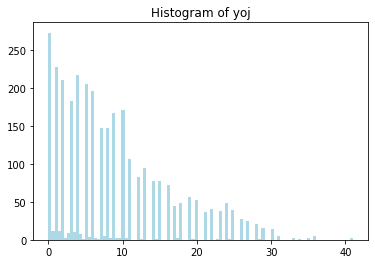

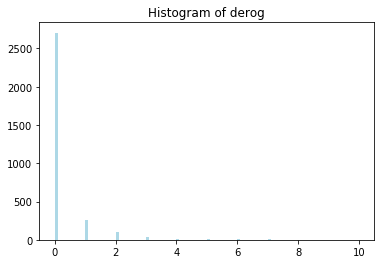

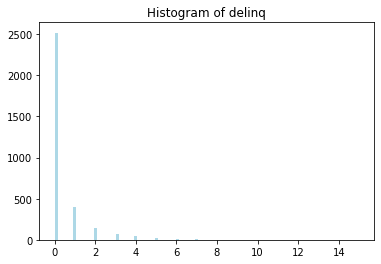

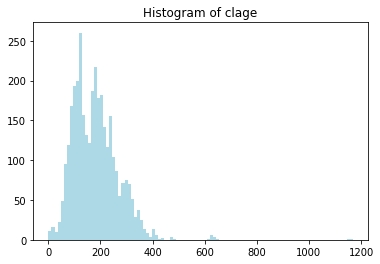

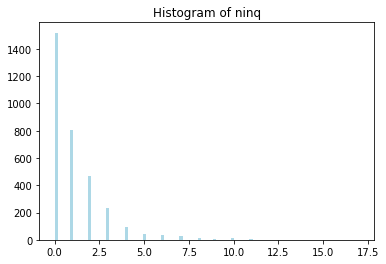

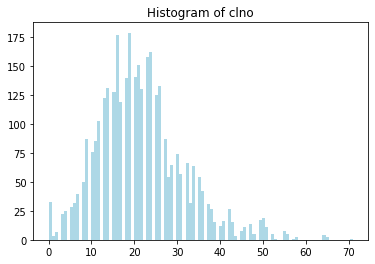

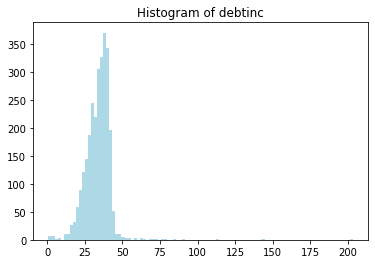

In [309]:
for i in df_num.columns:
    plt.figure()
    plt.hist(df_num[i],bins=100,color="lightblue")
    plt.title("Histogram of "+ i)
    

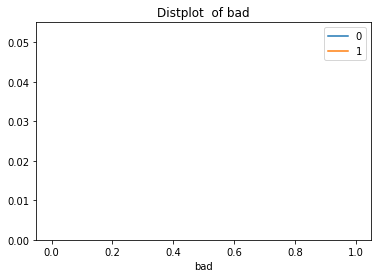

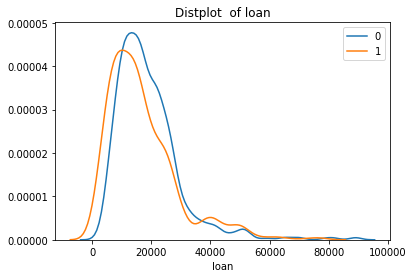

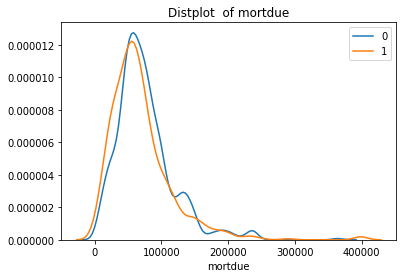

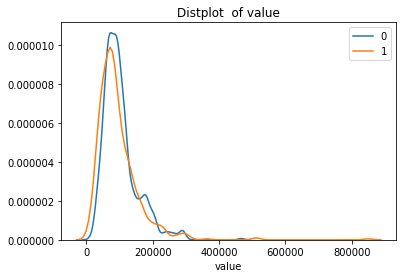

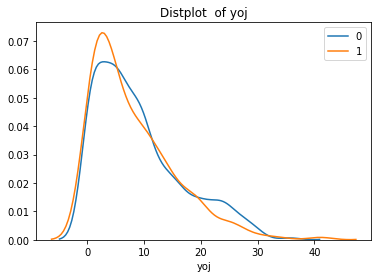

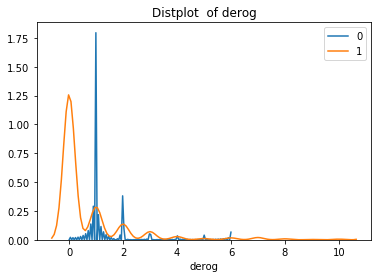

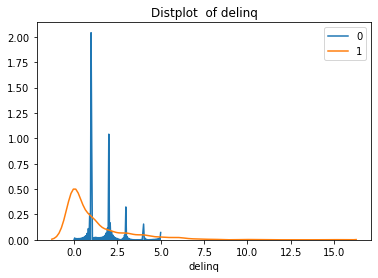

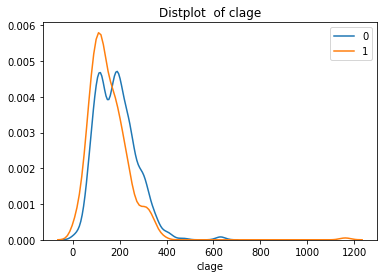

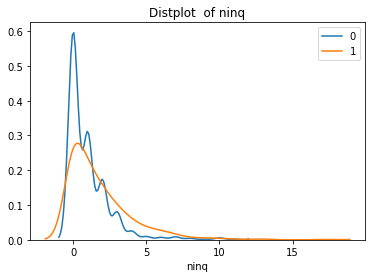

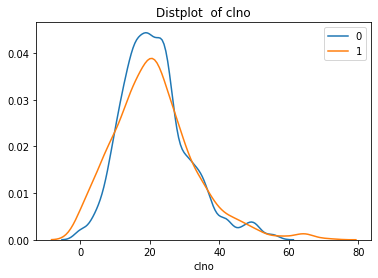

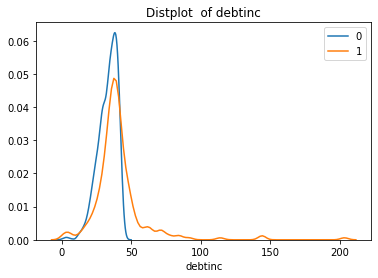

In [310]:

for i in  df_num.columns:
    plt.figure()
    sns.distplot(df_num[i][df_num["bad"] == 0],label=0, hist=False)
    sns.distplot(df_num[i][df_num["bad"] == 1],label=1, hist=False)
    plt.title("Distplot  of "+ i)
    plt.legend()

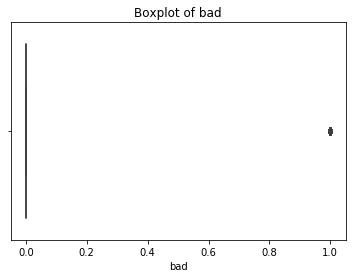

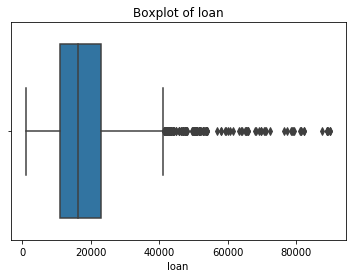

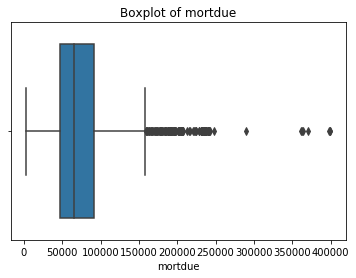

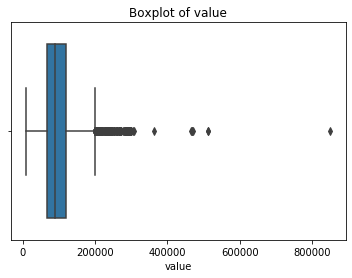

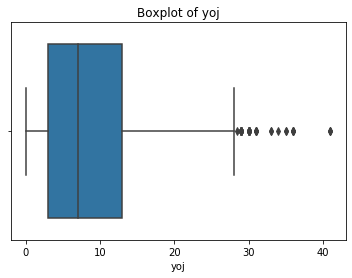

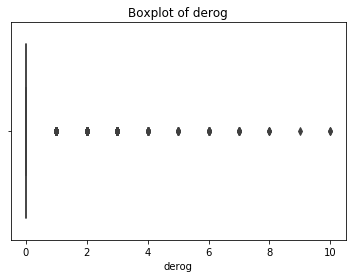

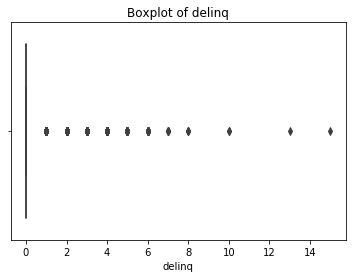

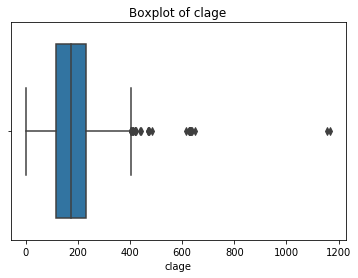

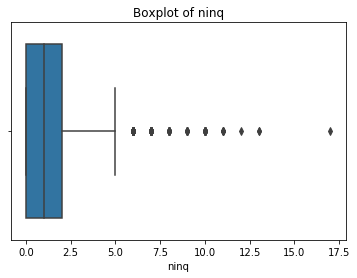

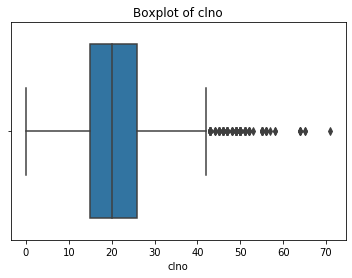

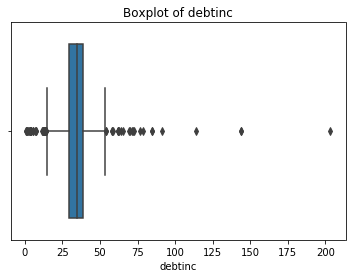

In [311]:
# Degiskenlerin 
for i in df_num.columns:
    plt.figure()
    sns.boxplot(df_num[i])
    plt.title("Boxplot of "+ i)


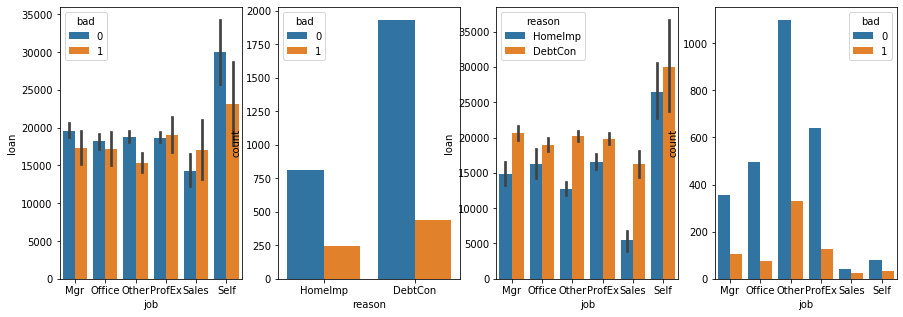

In [312]:
# Kategorik degiskenlerin frekans bilgisi barplot ve countplot yardımıyla çıkarıldı 
fig, ax = plt.subplots(1, 4, figsize = (15, 5))
sns.barplot(x='job', y='loan', hue='bad', data=df, ax=ax[0])
sns.countplot('reason', hue='bad', data=df, ax=ax[1])
sns.barplot(x='job', y='loan', hue='reason', data=df, ax=ax[2])
sns.countplot('job', hue='bad', data=df, ax=ax[3])
#plt.tight_layout()

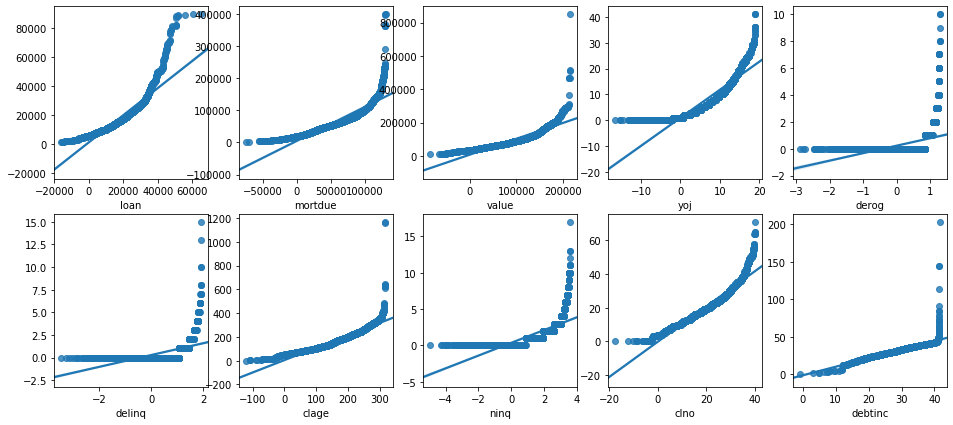

In [313]:
plt.figure(figsize=(16, 7))
for i, column in enumerate(df_num.select_dtypes(exclude=['category']).columns[1:], 1):
    plt.subplot(2, 5, i)
    randNorm = np.random.normal(np.mean(df_num[column]), np.std(df_num[column]), len(df_num[column]))
    sns.regplot(np.sort(randNorm), np.sort(df_num[column]))
    plt.xlabel(f'{column}')


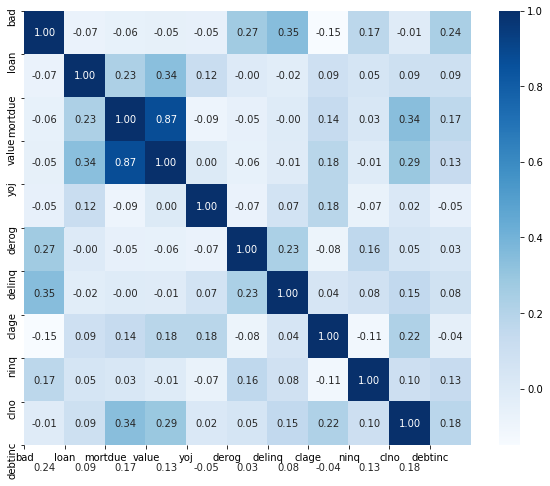

In [314]:
#Korelasyon matrisinin oluşturulması
corr = df_num.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap="Blues",annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

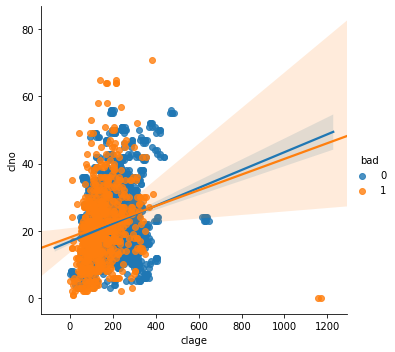

In [315]:
sns.lmplot(x="clage", y="clno", hue="bad", data=df)

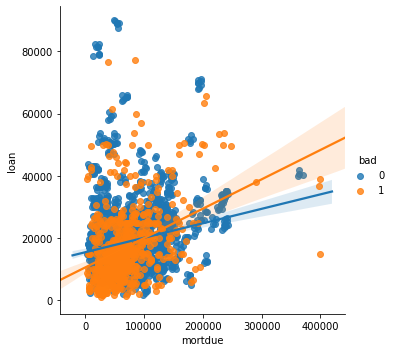

In [316]:
sns.lmplot(x="mortdue", y="loan", hue="bad", data=df)

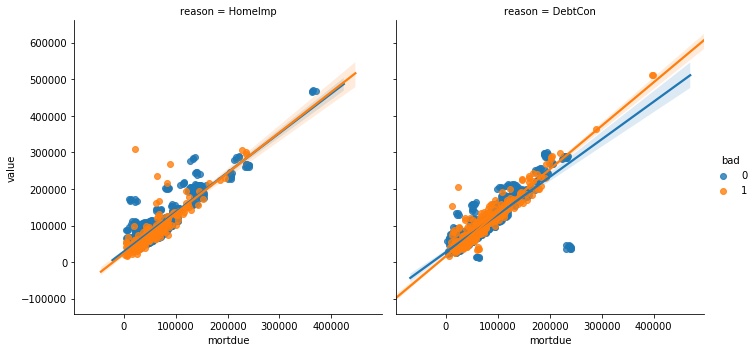

In [317]:
sns.lmplot(x="mortdue", y="value", hue="bad",col= "reason", data=df)

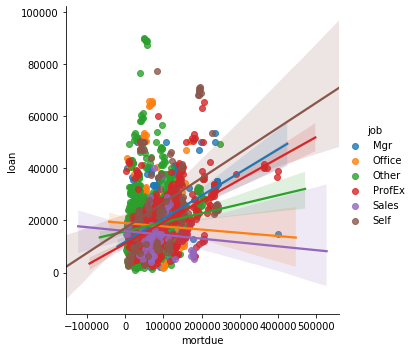

In [318]:
sns.lmplot(x="mortdue", y="loan", hue="job", data=df)

C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


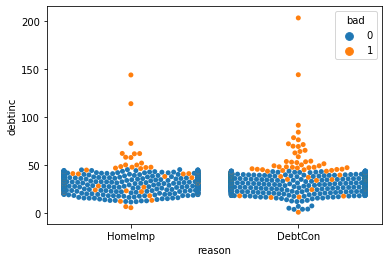

In [319]:
sns.swarmplot(x="reason", y="debtinc",hue="bad", data=hmelq)


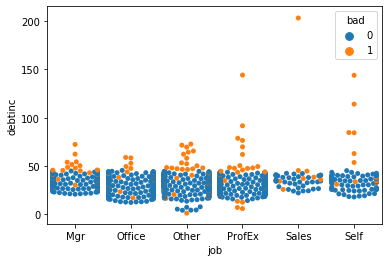

In [320]:
sns.swarmplot(x="job", y="debtinc",hue="bad", data=hmelq)


C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


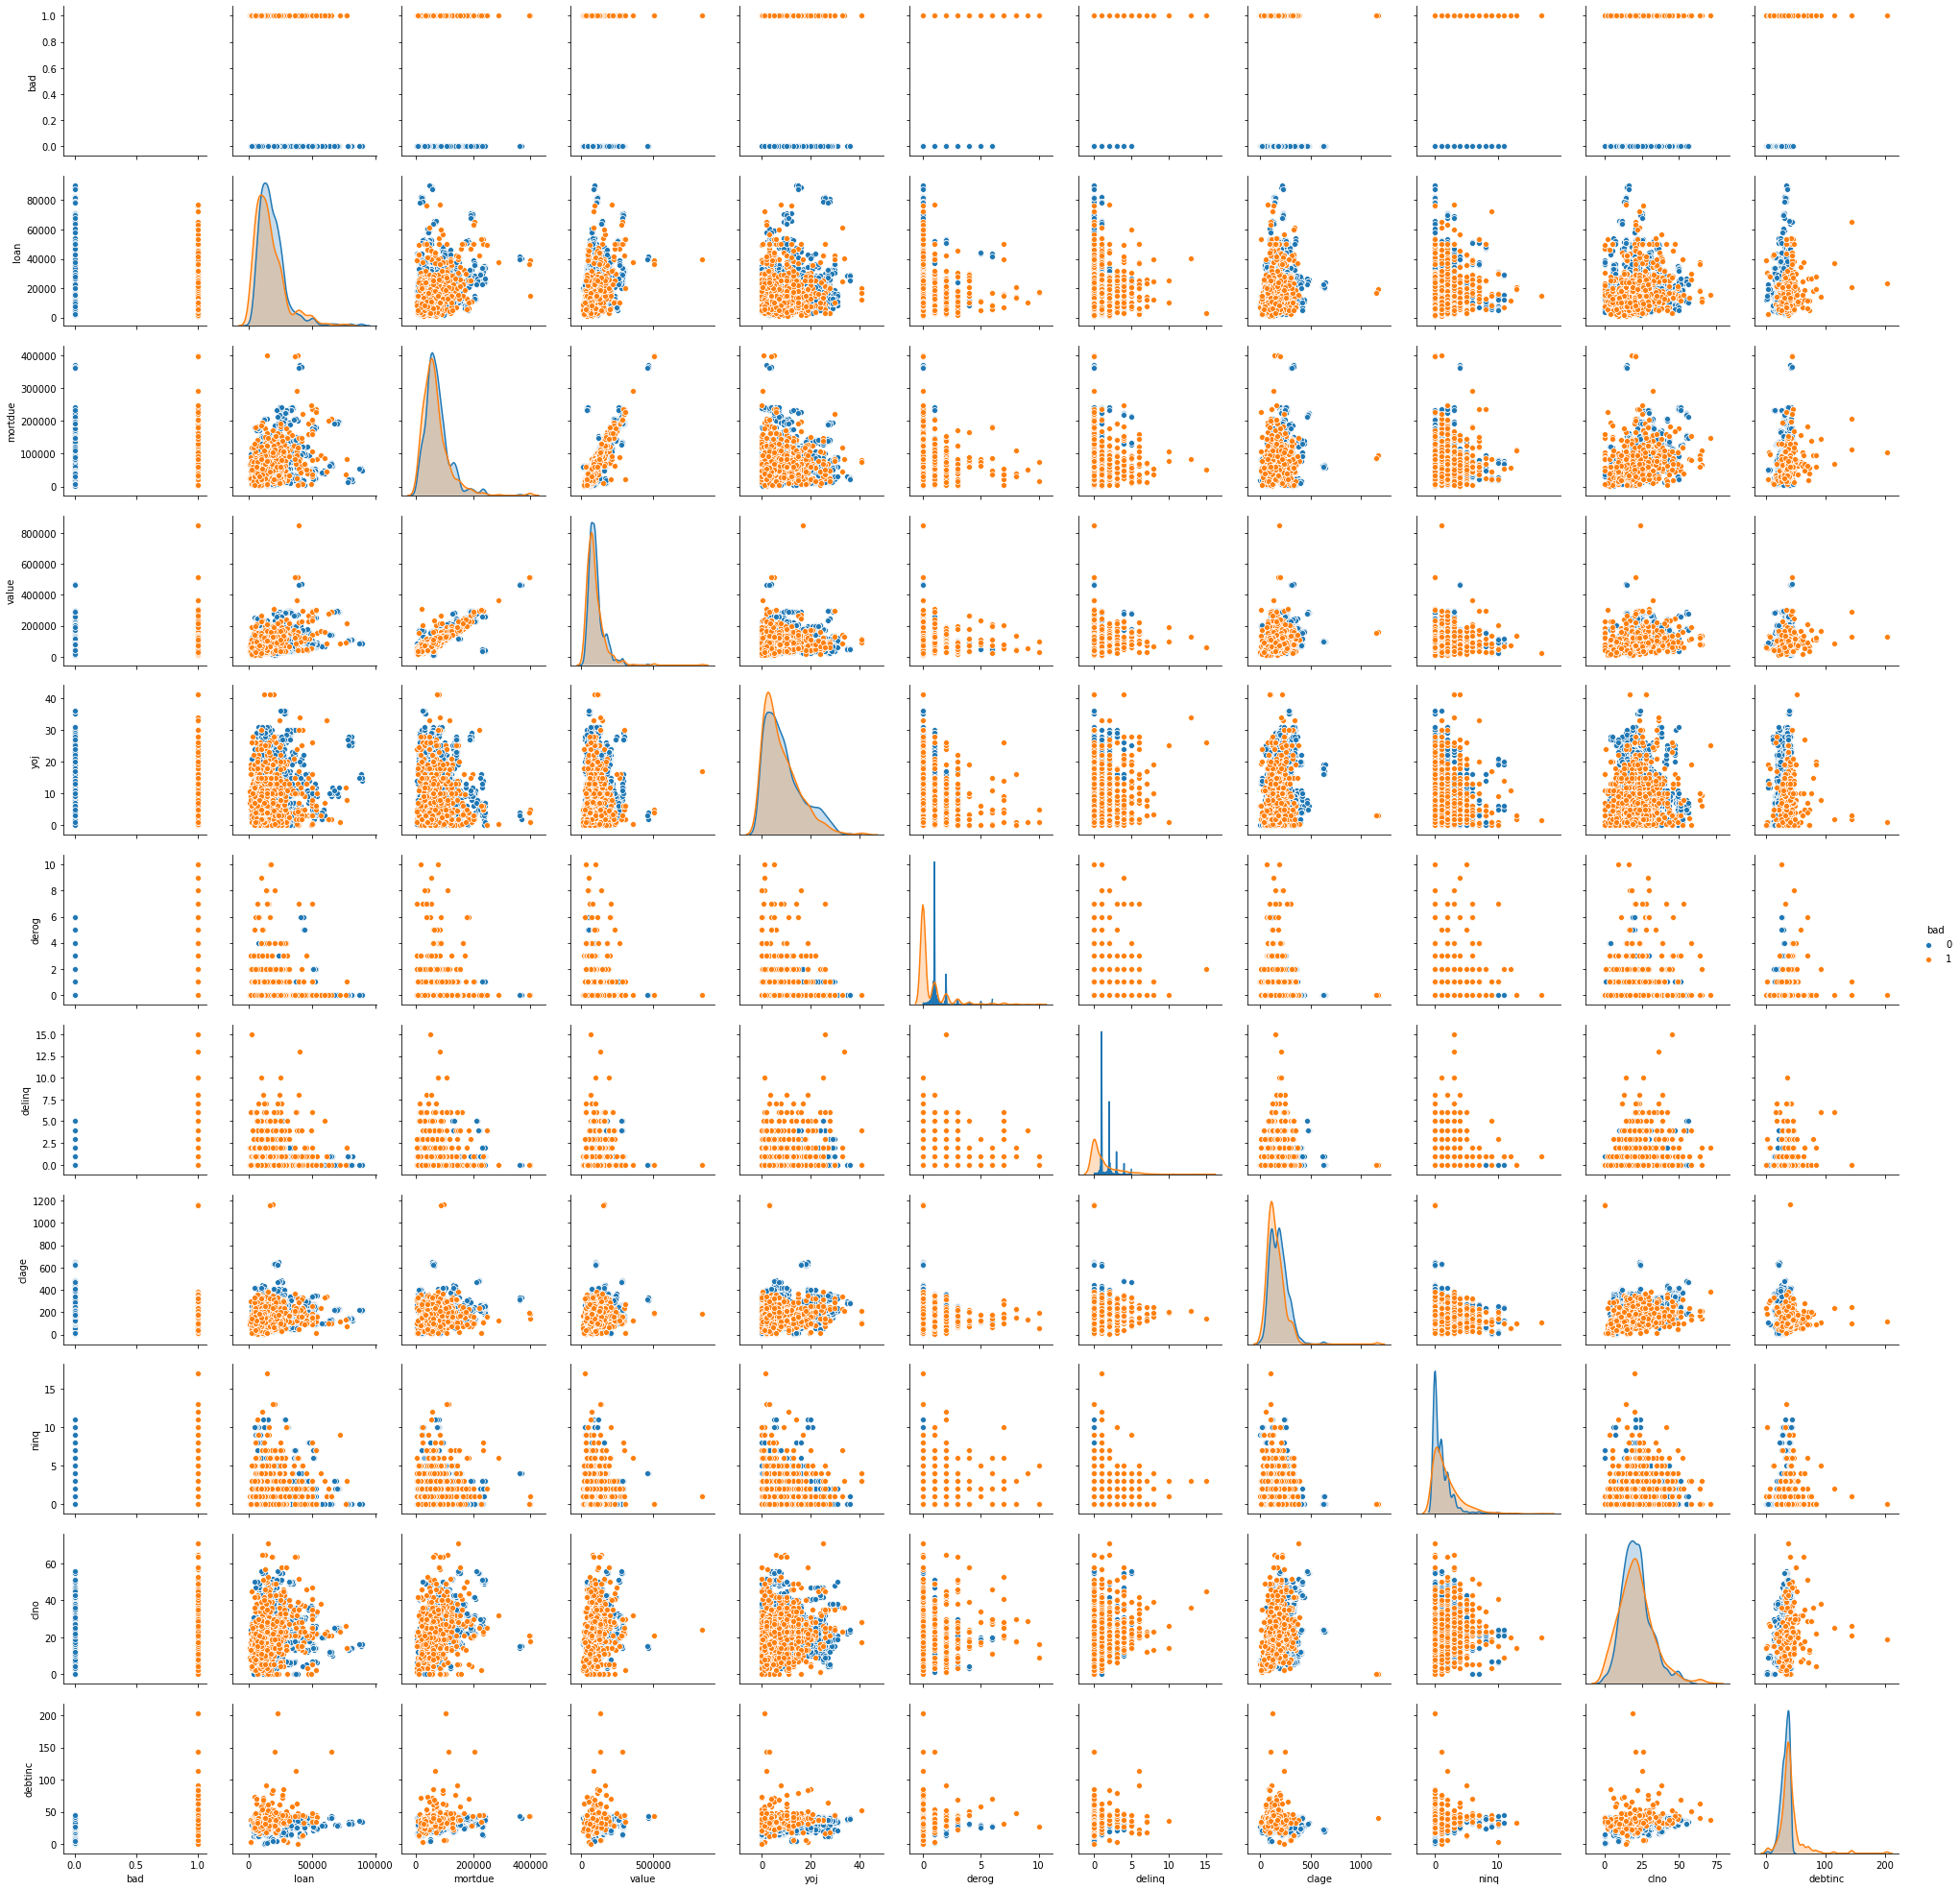

In [321]:
sns.pairplot(data=df_num,hue="bad")

In [322]:
# Çıkan sonuçlar :
# Value- mortdue arasında 0.87  (yüksek pozitif korelasyon)
# bad degiskeninin derog, delinq ve debtinc ile pozitif ilişkisi vardır


In [323]:
# crosstab()

In [324]:
pd.crosstab(df["bad"],df["reason"],normalize="columns").style.background_gradient(cmap="summer_r")


reason,DebtCon,HomeImp
bad,,
0,0.814424,0.769376
1,0.185576,0.230624


In [325]:
pd.crosstab(df["bad"],df["job"],normalize="columns").style.background_gradient(cmap="summer_r")

job,Mgr,Office,Other,ProfEx,Sales,Self
bad,,,,,,
0,0.767896,0.86819,0.767994,0.833116,0.651515,0.704348
1,0.232104,0.13181,0.232006,0.166884,0.348485,0.295652


## Gerekli Testlerin Gerçekleştirilmesi

In [326]:
# Normallik Varsayımı - Shapiro Wilks Testi 

In [327]:
# Normallik testinin hipotezleri :
# H0: Orneklem Normal (Gaussian) dağılımdan gelmektedir, (Fail to reject)
# H1: Orneklem Normal (Gaussian) dağılım gostermemektedir, (Reject)

In [328]:
df_new = df.dropna(subset=["mortdue"])
stat, p = stats.shapiro(df_new["mortdue"])

print("Statistics:%3.3f, p=%.3f " % (stat,p))

alpha = 0.05 
if p>alpha:
    print("Orneklem Normal (Gaussian) Dagilimdan gelmektedir (Fail to Reject H0)")
else:
    print("Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)")

Statistics:0.882, p=0.000 
Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)


In [329]:
df_new = df.dropna(subset=["value"])
stat, p = stats.shapiro(df_new["value"])

print("Statistics:%3.3f, p=%.3f " % (stat,p))

alpha = 0.05 
if p>alpha:
    print("Orneklem Normal (Gaussian) Dagilimdan gelmektedir (Fail to Reject H0)")
else:
    print("Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)")

Statistics:0.848, p=0.000 
Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)


In [330]:
stat, p = stats.shapiro(df["loan"])

print("Statistics:%3.3f, p=%.3f " % (stat,p))

alpha = 0.05 
if p>alpha:
    print("Orneklem Normal (Gaussian) Dagilimdan gelmektedir (Fail to Reject H0)")
else:
    print("Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)")

Statistics:0.849, p=0.000 
Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)


In [331]:
df_new = df.dropna(subset=["yoj"])
stat, p = stats.shapiro(df_new["yoj"])

print("Statistics:%3.3f, p=%.3f " % (stat,p))

alpha = 0.05 
if p>alpha:
    print("Orneklem Normal (Gaussian) Dagilimdan gelmektedir (Fail to Reject H0)")
else:
    print("Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)")

Statistics:0.904, p=0.000 
Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)


In [332]:
df_new = df.dropna(subset=["clage"])
stat, p = stats.shapiro(df_new["clage"])

print("Statistics:%3.3f, p=%.3f " % (stat,p))

alpha = 0.05 
if p>alpha:
    print("Orneklem Normal (Gaussian) Dagilimdan gelmektedir (Fail to Reject H0)")
else:
    print("Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)")

Statistics:0.920, p=0.000 
Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)


In [333]:
df_new = df.dropna(subset=["derog"])
stat, p = stats.shapiro(df_new["derog"])

print("Statistics:%3.3f, p=%.3f " % (stat,p))

alpha = 0.05 
if p>alpha:
    print("Orneklem Normal (Gaussian) Dagilimdan gelmektedir (Fail to Reject H0)")
else:
    print("Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)")

Statistics:0.338, p=0.000 
Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)


In [334]:
df_new = df.dropna(subset=["delinq"])
stat, p = stats.shapiro(df_new["delinq"])

print("Statistics:%3.3f, p=%.3f " % (stat,p))

alpha = 0.05 
if p>alpha:
    print("Orneklem Normal (Gaussian) Dagilimdan gelmektedir (Fail to Reject H0)")
else:
    print("Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)")

Statistics:0.450, p=0.000 
Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)


In [335]:
df_new = df.dropna(subset=["ninq"])
stat, p = stats.shapiro(df_new["ninq"])

print("Statistics:%3.3f, p=%.3f " % (stat,p))

alpha = 0.05 
if p>alpha:
    print("Orneklem Normal (Gaussian) Dagilimdan gelmektedir (Fail to Reject H0)")
else:
    print("Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)")

Statistics:0.691, p=0.000 
Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)


In [336]:
df_new = df.dropna(subset=["debtinc"])
stat, p = stats.shapiro(df_new["debtinc"])

print("Statistics:%3.3f, p=%.3f " % (stat,p))

alpha = 0.05 
if p>alpha:
    print("Orneklem Normal (Gaussian) Dagilimdan gelmektedir (Fail to Reject H0)")
else:
    print("Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)")

Statistics:0.785, p=0.000 
Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)


In [337]:
# Döngü yardımıyla shapiro wilks testinin gerçekleştirilmesi
grps=pd.unique(df.bad.values)
for i in df_num.columns:
    for j in grps:
        df_new = df.dropna(subset=[i])
        stat, p = stats.shapiro(df_new[i][df["bad"]==j])
        print("Statistics:%3.3f, p=%.3f " % (stat,p))
        alpha = 0.05
        if p>alpha:
            print(i,j," için Orneklem Normal (Gaussian) Dagilimdan gelmektedir (Fail to Reject H0)")
        else:
            print(i,j," için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)")
    print("******************************************************************************")

C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\morestats.py:1673: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


Statistics:1.000, p=1.000 
bad 0  için Orneklem Normal (Gaussian) Dagilimdan gelmektedir (Fail to Reject H0)
Statistics:1.000, p=1.000 
bad 1  için Orneklem Normal (Gaussian) Dagilimdan gelmektedir (Fail to Reject H0)
******************************************************************************
Statistics:0.835, p=0.000 
loan 0  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.864, p=0.000 
loan 1  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
******************************************************************************
Statistics:0.895, p=0.000 
mortdue 0  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.822, p=0.000 
mortdue 1  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
******************************************************************************
Statistics:0.878, p=0.000 
value 0  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.746, 

In [338]:
# Örneklem normal dağılımdan gelmediği görülmüştür. Bu nedenle nonparametrik testlerin uygulanması gerekiyor.

In [339]:
# Varyans Homojenliği Testi - Levene Testi ile gerçekleştirilir

In [340]:
# Varyans Homojenliği Testinin Hipotezleri 
# H0 : Varyanslar  Homojendir
# H1 : Varyanslar Homojen Değildir.

In [344]:
grps=pd.unique(df.bad.values)
for i in df_num.columns:
    for j in grps:
        df_new = df.dropna(subset=[i])
        stat, p = stats.levene(df_new[i][df["bad"]==0],df_new[i][df["bad"]==1])
        print("Statistics:%3.3f, p=%.3f " % (stat,p))
        alpha = 0.05
        if p>alpha:
            print(i,j," için varyans homojendir. (Fail to Reject H0)")
        else:
            print(i,j," için varyans homojen degildir. (reject H0)")
    print("******************************************************************************")

Statistics:nan, p=nan 
bad 0  için varyans homojen degildir. (reject H0)
Statistics:nan, p=nan 
bad 1  için varyans homojen degildir. (reject H0)
******************************************************************************
Statistics:6.343, p=0.012 
loan 0  için varyans homojen degildir. (reject H0)
Statistics:6.343, p=0.012 
loan 1  için varyans homojen degildir. (reject H0)
******************************************************************************
Statistics:0.635, p=0.426 
mortdue 0  için varyans homojendir. (Fail to Reject H0)
Statistics:0.635, p=0.426 
mortdue 1  için varyans homojendir. (Fail to Reject H0)
******************************************************************************
Statistics:5.362, p=0.021 
value 0  için varyans homojen degildir. (reject H0)
Statistics:5.362, p=0.021 
value 1  için varyans homojen degildir. (reject H0)
******************************************************************************
Statistics:2.667, p=0.103 
yoj 0  için varyans homojendir.

In [ ]:
# mortdue,yoj,clage varyansları homojendir
# debtinc,clno,ninq,delinq,derog,value,loan varyansları homojen değildir

In [ ]:
# bad degişkenini kategorik değikene çevirmek

In [355]:
#diğer değişkenlerin bad amaç değişkeni üzerindeki etkilerini görmek için 
import statsmodels.formula.api as smf
results=smf.ols('bad ~ (loan)',df).fit() 
print(results.summary()) 
# p value degeri 0.05 ten küçük olduğu için bad ve loan arasında anlamlı bir farklılık vardır.

                            OLS Regression Results                            
Dep. Variable:                    bad   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     18.38
Date:                Wed, 29 Jul 2020   Prob (F-statistic):           1.86e-05
Time:                        00:14:04   Log-Likelihood:                -1784.2
No. Observations:                3576   AIC:                             3572.
Df Residuals:                    3574   BIC:                             3585.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2464      0.013     19.197      0.0

In [356]:
results=smf.ols('bad ~ (mortdue)',df).fit() 
print(results.summary()) 
# p value degeri 0.05 ten küçük olduğu için bad ve mortdue arasında anlamlı bir farklılık vardır.

                            OLS Regression Results                            
Dep. Variable:                    bad   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     10.34
Date:                Wed, 29 Jul 2020   Prob (F-statistic):            0.00132
Time:                        00:16:41   Log-Likelihood:                -1620.5
No. Observations:                3262   AIC:                             3245.
Df Residuals:                    3260   BIC:                             3257.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2354      0.014     17.274      0.0

In [357]:
results=smf.ols('bad ~ (value )',df).fit() 
print(results.summary()) 
#p value degeri 0.05 ten küçük oldugu için bad ve value arasında anlamlı bir farklılık vardır 

                            OLS Regression Results                            
Dep. Variable:                    bad   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     8.887
Date:                Wed, 29 Jul 2020   Prob (F-statistic):            0.00289
Time:                        00:19:57   Log-Likelihood:                -1663.4
No. Observations:                3512   AIC:                             3331.
Df Residuals:                    3510   BIC:                             3343.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2220      0.014     16.143      0.0

In [358]:

results=smf.ols('bad ~ (yoj )',df).fit() 
print(results.summary()) 
#p value degeri 0.05 ten küçük oldugu için bad ve yoj arasında anlamlı bir farklılık vardır 

                            OLS Regression Results                            
Dep. Variable:                    bad   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     8.686
Date:                Wed, 29 Jul 2020   Prob (F-statistic):            0.00323
Time:                        00:21:28   Log-Likelihood:                -1673.4
No. Observations:                3264   AIC:                             3351.
Df Residuals:                    3262   BIC:                             3363.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2305      0.011     21.201      0.0

In [359]:
results=smf.ols('bad ~ (derog  )',df).fit() 
print(results.summary()) 
#p value degeri 0.05 ten küçük oldugu için bad ve yoj arasında anlamlı bir farklılık vardır 

                            OLS Regression Results                            
Dep. Variable:                    bad   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     249.4
Date:                Wed, 29 Jul 2020   Prob (F-statistic):           3.99e-54
Time:                        00:22:06   Log-Likelihood:                -1521.0
No. Observations:                3149   AIC:                             3046.
Df Residuals:                    3147   BIC:                             3058.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1768      0.007     24.207      0.0

In [360]:
results=smf.ols('bad ~ (delinq)',df).fit() 
print(results.summary()) 
#p value degeri 0.05 ten küçük oldugu için bad ve delinq arasında anlamlı bir farklılık vardır 

                            OLS Regression Results                            
Dep. Variable:                    bad   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     437.0
Date:                Wed, 29 Jul 2020   Prob (F-statistic):           4.14e-91
Time:                        00:22:49   Log-Likelihood:                -1459.8
No. Observations:                3225   AIC:                             2924.
Df Residuals:                    3223   BIC:                             2936.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1523      0.007     21.145      0.0

In [361]:
results=smf.ols('bad ~ (ninq)',df).fit() 
print(results.summary()) 
#p value degeri 0.05 ten küçük oldugu için bad ve ninq arasında anlamlı bir farklılık vardır 

                            OLS Regression Results                            
Dep. Variable:                    bad   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     103.0
Date:                Wed, 29 Jul 2020   Prob (F-statistic):           7.36e-24
Time:                        00:23:24   Log-Likelihood:                -1628.2
No. Observations:                3273   AIC:                             3260.
Df Residuals:                    3271   BIC:                             3273.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1571      0.008     18.621      0.0

In [362]:

results=smf.ols('bad ~ (clno)',df).fit() 
print(results.summary()) 
#p value degeri 0.05 ten büyük oldugu için bad ve clno arasında anlamlı bir farklılık yoktur 

                            OLS Regression Results                            
Dep. Variable:                    bad   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2776
Date:                Wed, 29 Jul 2020   Prob (F-statistic):              0.598
Time:                        00:23:55   Log-Likelihood:                -1719.9
No. Observations:                3443   AIC:                             3444.
Df Residuals:                    3441   BIC:                             3456.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2060      0.016     12.947      0.0

In [363]:
results=smf.ols('bad ~ (debtinc )',df).fit() 
print(results.summary()) 
#p value degeri 0.05 ten küçük oldugu için bad ve clno arasında anlamlı bir farklılık vardır 

                            OLS Regression Results                            
Dep. Variable:                    bad   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     166.7
Date:                Wed, 29 Jul 2020   Prob (F-statistic):           4.42e-37
Time:                        00:24:58   Log-Likelihood:                -313.70
No. Observations:                2809   AIC:                             631.4
Df Residuals:                    2807   BIC:                             643.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1614      0.020     -8.178      0.0

In [ ]:
# Sonuç olarak numerik amaç değikeni ve numeric bağımsız değişken arasındaki çıkarımsal istatistik sonuçlarını yorumlamak
# için lineer regresyon analizi gerçekleştirdim ve bunun sonucunda bad değişkeni üzerinde clno bağımsız değişkeni hariç 
# bütün değişkenlerin anlamlı olduğunu görmüş oldum. 